In [1]:
import numpy as np
from matplotlib import pyplot
import scipy as sp
%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
from sklearn import svm

SVM_linear = svm.LinearSVC(C=1)

In [16]:
X = iris.data[:,:2]
y = iris.target

indicies = np.random.permutation(len(X))
test_size = 15
X_train = X[indicies[:-test_size]]
y_train = y[indicies[:-test_size]]
X_test = X[indicies[-test_size:]]
y_test = y[indicies[-test_size:]]

In [5]:
from sklearn import metrics
SVM_linear.fit(X_train, y_train)
y_pred = SVM_linear.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Overall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       0.60      0.75      0.67         4
          2       0.75      0.60      0.67         5

avg / total       0.81      0.80      0.80        15

Overall Accuracy: 0.8


In [6]:
import seaborn

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def svmPlot(X_train, y_train, X_test, y_test, models):
    x_min = np.min(X[:, 0])

def svmPlot(X,y,model):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
     np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)

    # predict on each mesh grid points.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # counter plot with filling color dependent on Z
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # scatter plot the real data 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with linear kernel')
    plt.show()

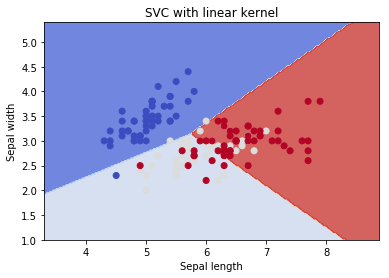

In [7]:

SVM_linear = svm.LinearSVC(C=1)
SVM_linear.fit(X_train, y_train)
svmPlot(X, y, SVM_linear)


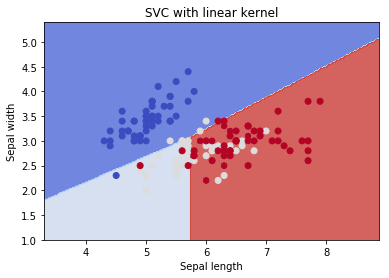

In [8]:
C=0.1
SVM_linear = svm.LinearSVC(C=C)
SVM_linear.fit(X_train, y_train)
svmPlot(X, y, SVM_linear)

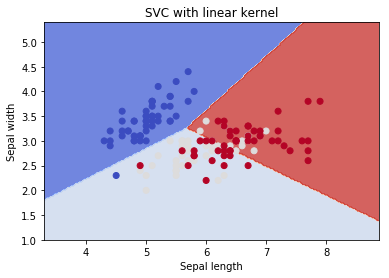

In [9]:
C=10
SVM_linear = svm.LinearSVC(C=C)
SVM_linear.fit(X_train, y_train)
svmPlot(X, y, SVM_linear)

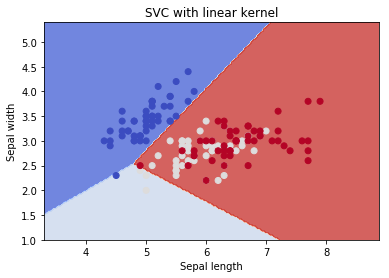

In [10]:
C=1000000
SVM_linear = svm.LinearSVC(C=C)
SVM_linear.fit(X_train, y_train)
svmPlot(X, y, SVM_linear)

In [11]:
SVM_poly = svm.SVC(kernel="poly", C=1, degree=1, coef0=1)
SVM_brf = svm.SVC(kernel="rbf", C=1, gamma=1)

In [17]:
from sklearn.model_selection import GridSearchCV
g_range = 2. ** np.arange(-10, 10, 1)
C_range = 2. ** np.arange(-10, 10, 1)
parameters = [{'gamma': g_range, 'C': C_range, 'kernel': ['rbf']}]
grid = GridSearchCV(svm.SVC(), parameters, cv=10, n_jobs=4)
grid.fit(X_train, y_train)
bestG = grid.best_params_['gamma']
bestC = grid.best_params_['C']
print("The best params are gamma=%f and C=%f"%(np.log2(bestG), np.log2(bestC)))

The best params are gamma=-1.000000 and C=-3.000000


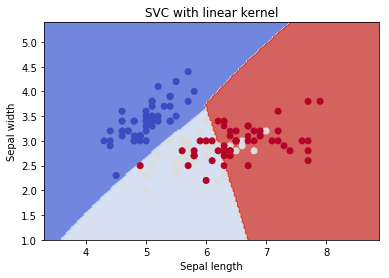

In [20]:
C=2**(2)
gamma = 2**(-4)
SVM_linear = svm.SVC(kernel="rbf", gamma=gamma, C=C)
SVM_linear.fit(X_train, y_train)
svmPlot(X, y, SVM_linear)

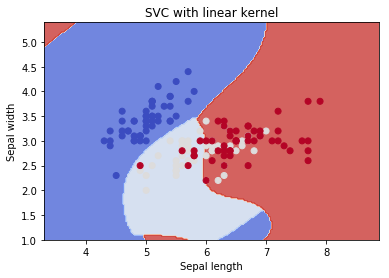

In [23]:
C=2**3
gamma = 2**(0)
SVM_linear = svm.SVC(kernel="rbf", gamma=gamma, C=C)
SVM_linear.fit(X_train, y_train)
svmPlot(X, y, SVM_linear)

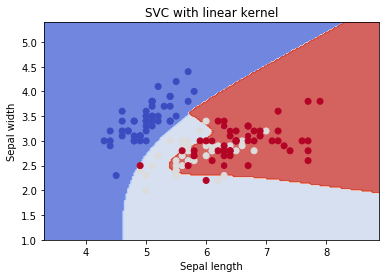

In [62]:
SVM_poly = svm.SVC(kernel="poly", C=1, degree=7, coef0=1)
SVM_poly.fit(X_train, y_train)
svmPlot(X, y, SVM_poly)

In [29]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
test_size = int(0.1 * len(X))

indicies = np.random.permutation(len(X))
X_train = X[indicies[:-test_size],:]
y_train = y[indicies[:-test_size]]
X_test = X[indicies[-test_size:],:]
y_test = y[indicies[-test_size:]]

In [34]:
from sklearn.model_selection import GridSearchCV
g_range = 2. ** np.arange(-10, 10, 1)
C_range = 2. ** np.arange(-10, 10, 1)
parameters = [{'gamma': g_range, 'C': C_range, 'kernel': ['linear']}]
grid = GridSearchCV(svm.SVC(), parameters, cv=10, n_jobs=4)
grid.fit(X_train, y_train)
bestG = grid.best_params_['gamma']
bestC = grid.best_params_['C']
print("The best params are gamma=%f and C=%f"%(np.log2(bestG), np.log2(bestC)))

The best params are gamma=-10.000000 and C=-10.000000


In [30]:
from sklearn.model_selection import GridSearchCV
g_range = 2. ** np.arange(-10, 10, 1)
C_range = 2. ** np.arange(-10, 10, 1)
parameters = [{'gamma': g_range, 'C': C_range, 'kernel': ['rbf']}]
grid = GridSearchCV(svm.SVC(), parameters, cv=10, n_jobs=4)
grid.fit(X_train, y_train)
bestG = grid.best_params_['gamma']
bestC = grid.best_params_['C']
print("The best params are gamma=%f and C=%f"%(np.log2(bestG), np.log2(bestC)))

The best params are gamma=-10.000000 and C=1.000000


In [32]:
SVM_rbf = svm.SVC(kernel='rbf', gamma=2**(-10), C=2**1)
SVM_rbf.fit(X_train, y_train)
y_pred = SVM_rbf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Overall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        21
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00        16
          4       1.00      1.00      1.00        20
          5       1.00      1.00      1.00        21
          6       1.00      1.00      1.00        12
          7       1.00      1.00      1.00        27
          8       0.93      1.00      0.96        13
          9       1.00      0.94      0.97        18

avg / total       0.99      0.99      0.99       179

Overall Accuracy: 0.99
